# Heat Transfer in Ice

This week’s lab is designed to give you a better intuition regarding the time scales of heat diffusion in ice, described by the heat equation

$$ \frac{\partial T}{\partial t} = \alpha \nabla^2 T - u\cdot \nabla T $$

To gain experience with some solutions to this heat equation, we have prepared a Python notebook. The idea is to allow you to vary input parameters for a few scenarios and learn to better anticipate what the results might be. It is not important that you have a background in coding with python. Rather, the intent here is that you adjust inputs to the functions and think about the results.

##### Initial comments on using this notebook: 

- There are different cells for code and for 'markdown' which is the text. If you double click on the text you can change it, but there is no reason to do that now.

- I have provided helper notes on locations where I think that you should change the code to play around with one of the models (### Please Change! ###) as well as notes in places where you probably shouldn't change the code (### Don't Change ###). Having said that, if you are familiar with python feel free to change whatever you want.

- The code can be run with the buttons at the top or from the keyboard. Press 'Shift+Enter' to run a cell and advance to the next cell or 'Ctrl+Enter' to run a cell and stay in it.

- The figures are interactive. Try zooming, panning, or rescaling the figure to get a better look at the data.

In [4]:
### Don't Change ###

# Import the libraries that we are going to need
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt

# Import some local plotting functions
from plot_figures import *

# Dimensional Constant
spy  = 60.*60.*24.*365.24    # seconds per year (s yr-1)

### 1) Surface Perturbation

First, we will examine a very simple scenario where the entire domain begins at one temperature then the surface is perturbed to a new temperature. Heat will begin to diffuse into the domain and warm up the ice below the surface.

In [5]:
### Don't Change ###

# Function for the surface perturbation
def surfacePerturbation(T0,dT,t,z,α):
    t *= spy
    from scipy.special import erfc
    # equation 2.4-7 from Carslaw and Jaegar (1959)
    T = T0 + dT*erfc(abs(z)/(2.*np.sqrt(α*t)))
    return T

##### Try it out

Try running this function and making a figure! Everything is set up for you below, but try adjusting some of the parameters like T0 (initial temperature), dT (temperature change), t (time), and zs (distances from the surface) to get a feeling for the time scales for diffusion of this surface perturbation.

<IPython.core.display.Javascript object>


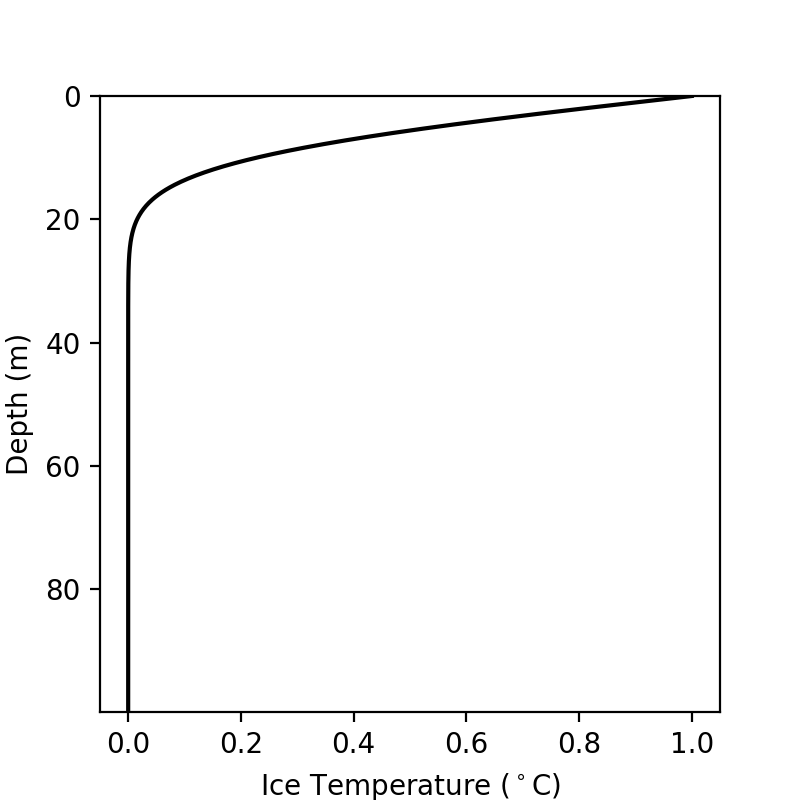

In [10]:
### Please Change! ###

# Set up the problem with these constants
T0 = 0.                      # Initial Temperature
dT = 1.                      # Temperature Change
t = 1.                       # time in years
zs = np.arange(0,100,0.1)    # a set of distances
α = 1.09e-6                  # Thermal Diffusivity of Ice (m2 s-1), if you change this the actual value is 1.09e-6

### Don't Change ###

# Plot the figure using a local plotting function
plot_perturbation_figure(T0,dT,t,zs,α,surfacePerturbation)

### Questions:

1) How do the results compare to your intuition about how long it should take for heat to diffuse into the ice?

2) If the temperature change is bigger does the perturbation propogate faster? or is it simply a scaling factor?

3) Did you try a different $\alpha$ (thermal diffusivity)? Does the rate of propogation scale linearly with $\alpha$?

### 2) Harmonic Surface Temperature

Now we are going to let the surface temperature change in time. If we choose to make the surface temperature a sinusoidal function, there is again a solution to the heat equation.

In [8]:
### Don't Change ###

# Surface Temperature Harmonic Function
def harmonicSurface(T0,Ta,t,z,omega,α=α):
    α *= spy
    # equation 2.6-8 from Carslaw and Jaegar (1959)
    T = T0 + Ta * np.exp(-z*np.sqrt(np.pi*ω/(α))) * np.sin((2.*np.pi*ω*t)-z*np.sqrt(np.pi*ω/(α)))
    return T

##### Try this new solution

Same as before, we want to play around with this model to get a feel for how it works. There are some initial values to try out, and a plotting script, but try different numbers to get a feel for the behavior.

*Please note that if you change the frequency you are probably going to have to change the times and the depths as well or you wont be able to see anything useful in the plot.

<IPython.core.display.Javascript object>


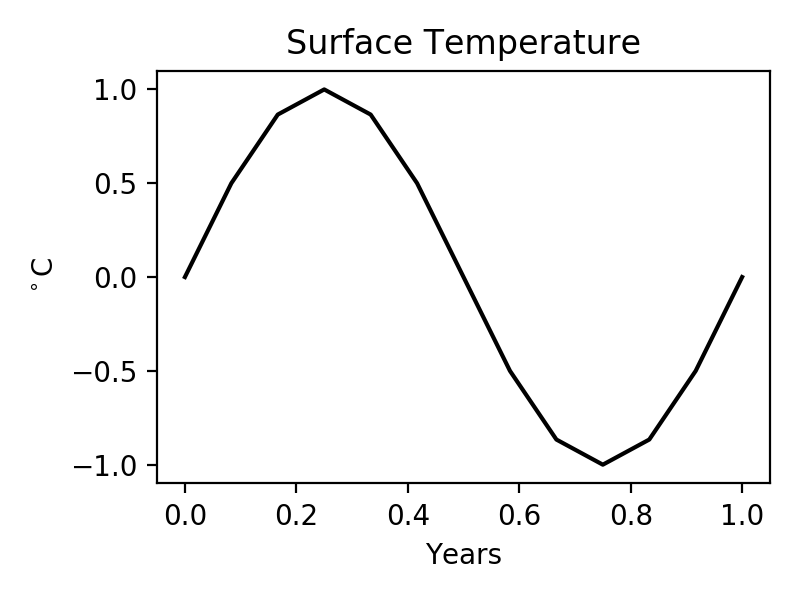

<IPython.core.display.Javascript object>


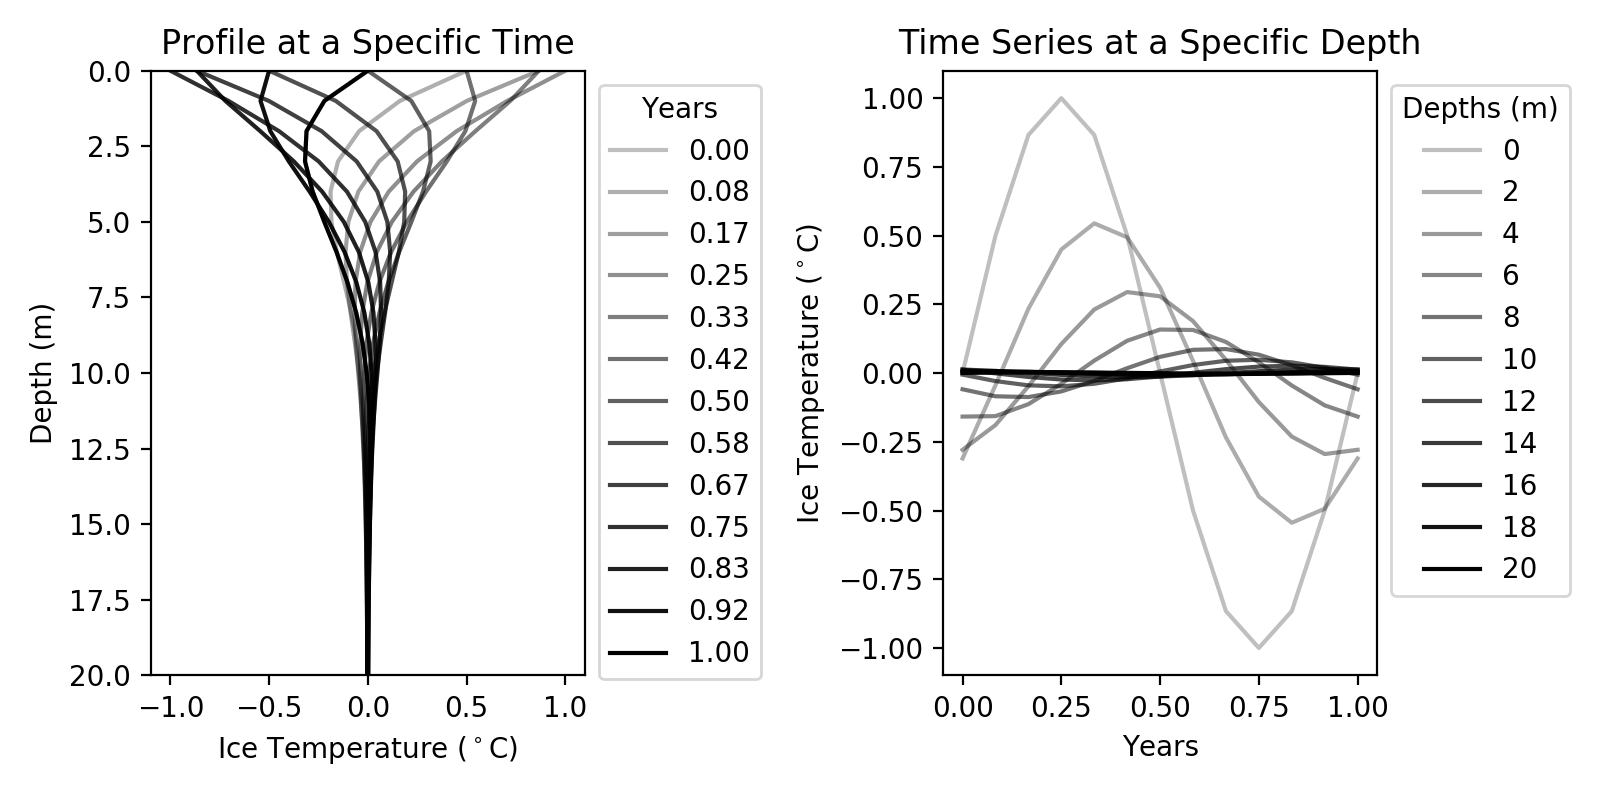

In [11]:
### Please Change! ###

# Set up the problem with these constants
T0 = 0.                       # mean temperature
Ta = 1.                       # amplitude of temperature variations
ts = np.linspace(0,1,13)      # time in years (13 so that we plot one profile for each month and an extra for '0')
zs = np.arange(0,21,1)        # a set of distances in meters
ω = 1.                    # frequency of oscillation (cycles per yr)

n_profiles = 10               # number of profiles to plot

### Don't Change ###

# Plot the figures using a local function imported from another script
plot_harmonic_figures(zs,ts,T0,Ta,ω,n_profiles,harmonicSurface)

### Questions:

In Cuffey and Paterson (2010) Chapter 9, they give us some helpful insight into an equation for the function that we were using above: 

- The amplitude of the sinusoidal temperature wave decreases as $exp(−z\sqrt{\frac{\pi \omega}{\alpha}})$. Thus, the higher the frequency, the more rapid the attenuation with depth.

- Temperature maxima and minima propagate at a velocity $2\sqrt{\pi \omega \alpha}$.

1) Use the equations above to fill in the table from their book (reproduced below). Note that they use period $P_\omega$ (we are using frequency $\omega = \frac{1}{P_\omega}$). You could complete the table with only the equations, but try playing with the model to visualize the result.

<img src="./candpTable.png" width="400">

2) In class on Wednesday we looked at some real data. I have plotted it again below. The 'winter cold wave' persists in the ice well into the summer months. Does this agree with your results above? What was the $\Delta t$ that you got for 1yr? Is it about the same as in the data?  

<img src="./data.png" width="600">